In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import scipy
from scipy import constants
from scipy.signal import find_peaks
import pandas as pd
from scipy.signal import argrelextrema

In [22]:
def plot_dat_file(filename, x, y, skiprows=0, start_row=None, end_row=None):
    #fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
    # Read data from the .dat file, handling missing values
    data = np.genfromtxt(filename, delimiter=',', skip_header=skiprows, filling_values=np.nan, usecols=np.arange(0,35,1))

     # Determine the range of rows to plot
    if start_row is None:
        start_row = 0
    if end_row is None or end_row > len(data):
        end_row = len(data)
        
    # Define column indices based on x and y arguments
    columns = {
         'temp': data[start_row:end_row, 3],       # Column 4 (index 3 in zero-based indexing)
        'field': data[start_row:end_row, 4],       # Column 5 (index 4 in zero-based indexing)
        'Position': data[start_row:end_row, 5],    # Column 6 (index 5 in zero-based indexing)
        'Resistance1': data[start_row:end_row, 6], # Column 7 (index 6 in zero-based indexing)
        'uA1': data[start_row:end_row, 7],         # Column 8 (index 7 in zero-based indexing)
        'Resistance2': data[start_row:end_row, 8], # Column 9 (index 8 in zero-based indexing)
        'uA2': data[start_row:end_row, 9],         # Column 10 (index 9 in zero-based indexing)
        'Resistance3': data[start_row:end_row, 10],# Column 11 (index 10 in zero-based indexing)
        'uA3': data[start_row:end_row, 11],        # Column 12 (index 11 in zero-based indexing)
        'Resistance4': data[start_row:end_row, 12],# Column 13 (index 12 in zero-based indexing)
        'uA4': data[start_row:end_row, 13]         # Column 14 (index 13 in zero-based indexing)
    }

    # Plot based on x and y arguments
    plt.figure(figsize=(8, 6))
    plt.plot(columns[x], columns[y], marker='o', linestyle='-', color='b', label=f'{y} vs {x}')
    plt.title(f'{y} vs {x} Plot')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [48]:
def multi_plot_stacked(series_ticker, series_labels, x, y, skiprows=0, start_rows=None, end_rows=None, vertical_offset=0, subtract_mean=None):
    # Plot results
    fig, ax = plt.subplots(1, 1, figsize=(6, 6), layout='constrained')
    ax.set_prop_cycle(color=['#e81416','#ffa500', '#faeb36','#79c314', '#008080','#487de7','#4b369d','#70369d'])

    all_x_data = []
    all_y_data = []
    current_offset = 0  # Initialize current offset to zero

    for nn, ticker_file in enumerate(series_ticker):
        data = np.genfromtxt(ticker_file, delimiter=',', skip_header=skiprows, filling_values=np.nan)
    
        # Determine the range of rows to plot for each dataset
        start_row = start_rows[nn] if start_rows is not None and nn < len(start_rows) else 0
        end_row = end_rows[nn] if end_rows is not None and nn < len(end_rows) else len(data)

        # Define column indices based on x and y arguments
        columns = {
            'temp': data[start_row:end_row, 3],       # Column 4 (index 3 in zero-based indexing)
            'field': data[start_row:end_row, 4],      # Column 5 (index 4 in zero-based indexing)
            'Position': data[start_row:end_row, 5],   # Column 6 (index 5 in zero-based indexing)
            'Resistance1': data[start_row:end_row, 6],# Column 7 (index 6 in zero-based indexing)
            'uA1': data[start_row:end_row, 7],        # Column 8 (index 7 in zero-based indexing)
            'Resistance2': data[start_row:end_row, 8],# Column 9 (index 8 in zero-based indexing)
            'uA2': data[start_row:end_row, 9],        # Column 10 (index 9 in zero-based indexing)
            'Resistance3': data[start_row:end_row, 10],# Column 11 (index 10 in zero-based indexing)
            'uA3': data[start_row:end_row, 11],       # Column 12 (index 11 in zero-based indexing)
            'Resistance4': data[start_row:end_row, 12],# Column 13 (index 12 in zero-based indexing)
            'uA4': data[start_row:end_row, 13]        # Column 14 (index 13 in zero-based indexing)
        }

        x_data = columns[x]
        y_data = columns[y]

        if subtract_mean is None:
            y_data = y_data + current_offset

        if subtract_mean==1:
            y_data = y_data + current_offset- np.nanmean(y_data)

        all_x_data.extend(x_data)
        all_y_data.extend(y_data)

        plt.plot(x_data, y_data, marker='o', linestyle='-', label=series_labels[nn], markersize=3)

        current_offset += vertical_offset  # Increase the offset for the next dataset

    # Set the limits of the axes based on the data ranges
    ax.set_xlim([min(all_x_data), max(all_x_data)])
    ax.set_ylim([min(all_y_data), max(all_y_data)])

    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.title(f'{y} vs {x} Plot Stacked (a.u.)')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.legend()
    plt.show()


In [53]:

def multi_subtract_line_plot(series_ticker, series_labels, x, y, bin_size=None, skiprows=0, start_row=None, end_row=None, vertical_offset=0):

    # Plot results
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
    ax.set_prop_cycle(color=['#e81416','#ffa500', '#faeb36','#79c314', '#008080','#487de7','#4b369d','#70369d'])
    
    current_offset = 0

    for nn, ticker_file in enumerate(series_ticker):
        data = np.genfromtxt(ticker_file, delimiter=',', skip_header=skiprows, filling_values=np.nan)
    
        # Determine the range of rows to plot
        if start_row is None:
            start_row = 0
        if end_row is None or end_row > len(data):
            end_row = len(data)

        # Extract x and y data based on column names
        columns = {
            'temp': data[start_row:end_row, 3],
            'field': data[start_row:end_row, 4],
            'Position': data[start_row:end_row, 5],
            'Resistance1': data[start_row:end_row, 6],
            'uA1': data[start_row:end_row, 7],
            'Resistance2': data[start_row:end_row, 8],
            'uA2': data[start_row:end_row, 9],
            'Resistance3': data[start_row:end_row, 10],
            'uA3': data[start_row:end_row, 11],
            'Resistance4': data[start_row:end_row, 12],
            'uA4': data[start_row:end_row, 13]
        }

        x_data = columns[x]
        y_data = columns[y]

        # Fit a linear model (y = mx + c)
        coeffs = np.polyfit(x_data, y_data, 1)
        m, c = coeffs

        # Calculate the fitted line
        fitted_line = m * x_data + c

        # Subtract the linear fit from y_data to get residuals
        residuals = y_data - fitted_line

        if bin_size is not None:
            # Average residuals in bins of size bin_size
            averaged_x = []
            averaged_residuals = []

            for i in range(0, len(x_data), bin_size):
                bin_x = x_data[i:i+bin_size]
                bin_residuals = residuals[i:i+bin_size]

                # Average x_data within the bin
                averaged_x.append(np.mean(bin_x))

                # Average residuals within the bin
                averaged_residuals.append(np.mean(bin_residuals))

            x_data = np.array(averaged_x)
            residuals = np.array(averaged_residuals)+current_offset

        plt.plot(x_data, residuals, marker='o', linestyle='-', label=series_labels[nn], markersize=5)
        
        current_offset+=vertical_offset

    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.title('Residuals after Subtracting Linear Fit')
    plt.xlabel(x)
    plt.ylabel(y)
    
    plt.grid(True)
    plt.legend()
    plt.show()


In [92]:
def multi_subtract_symmetric_plot(series_ticker, series_labels, x, y, skiprows=0, start_rows=None, end_rows=None, xmin=None, xmax=None, ymin=None, ymax=None, vertical_offset=1.0):

    fig, ax = plt.subplots(1, 1, figsize=(8, 6), constrained_layout=True)
    ax.set_prop_cycle(color=['#e81416','#ffa500', '#faeb36','#79c314', '#008080','#487de7','#4b369d','#70369d'])

    
    all_x_data = []

    current_offset=0

    for nn, ticker_file in enumerate(series_ticker):
        data = np.genfromtxt(ticker_file, delimiter=',', skip_header=skiprows, filling_values=np.nan)
    
        
        start_row = start_rows[nn] if start_rows is not None and nn < len(start_rows) else 0
        end_row = end_rows[nn] if end_rows is not None and nn < len(end_rows) else len(data)

        
        columns = {
            'temp': data[start_row:end_row, 3],       # Column 4 (index 3 in zero-based indexing)
            'field': data[start_row:end_row, 4],      # Column 5 (index 4 in zero-based indexing)
            'Position': data[start_row:end_row, 5],   # Column 6 (index 5 in zero-based indexing)
            'Resistance1': data[start_row:end_row, 6],# Column 7 (index 6 in zero-based indexing)
            'uA1': data[start_row:end_row, 7],        # Column 8 (index 7 in zero-based indexing)
            'Resistance2': data[start_row:end_row, 8],# Column 9 (index 8 in zero-based indexing)
            'uA2': data[start_row:end_row, 9],        # Column 10 (index 9 in zero-based indexing)
            'Resistance3': data[start_row:end_row, 10],# Column 11 (index 10 in zero-based indexing)
            'uA3': data[start_row:end_row, 11],       # Column 12 (index 11 in zero-based indexing)
            'Resistance4': data[start_row:end_row, 12],# Column 13 (index 12 in zero-based indexing)
            'uA4': data[start_row:end_row, 13]        # Column 14 (index 13 in zero-based indexing)
        }

        x_data = columns[x]
        y_data = columns[y]

        
        if len(x_data) == 0 or len(y_data) == 0:
            print(f"Dataset {series_labels[nn]} is empty after applying start_row and end_row indices.")
            continue

        # Fit y = mx + c)
        coeffs = np.polyfit(x_data, y_data, 2)
        n, m, c = coeffs

        # Calculate the fitted line
        fit_func = n*x_data**2 + m * x_data + c

        # Subtract the linear fit from y_data to get residuals
        residuals = y_data - fit_func
  
        
        print(f"Plotting dataset {series_labels[nn]} with offset {vertical_offset}")
        plt.plot(x_data, residuals + current_offset, marker='o', linestyle='-', label=series_labels[nn], markersize=2)
        current_offset+=vertical_offset

    # Plot configurations
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
    plt.title('Vertically Offset Residuals after Subtracting y=nx^2+mx+c')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)  
    plt.grid(True)
    plt.legend()
    plt.show()


Plotting dataset Cr2O3 no. 48 300K Field Sweep with offset 0.0004
Plotting dataset Cr2O3 no. 48 310K Field Sweep with offset 0.0004
Plotting dataset Cr2O3 no. 48 320K Field Sweep with offset 0.0004


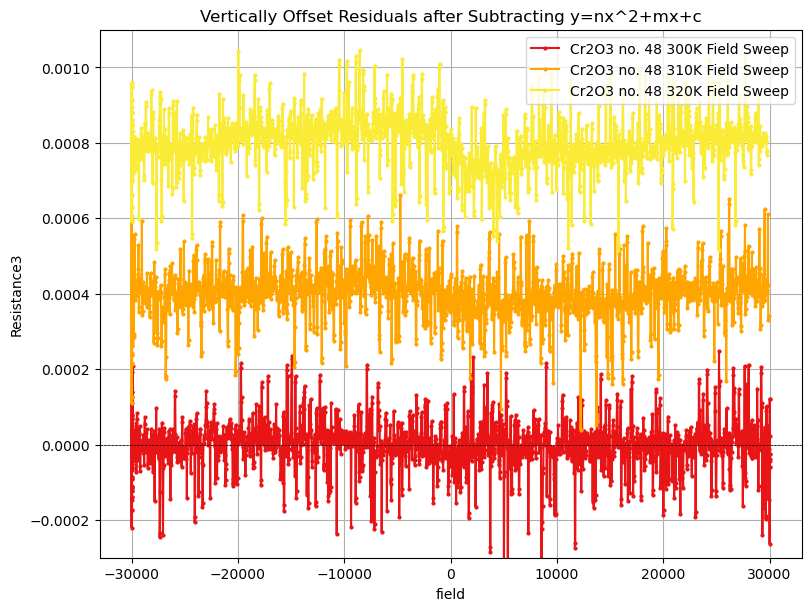

In [93]:
series_ticker = ['20240712_Cr2O3_48(20mT,600C)_Pt_top(5nm)_ch12(10um)_ch34(5um)_Rxx-0_005uA_Rxy-(ch1_ch3)1.5mA_300K_3Tsweep.dat',
                '20240712_Cr2O3_48(20mT,600C)_Pt_top(5nm)_ch12(10um)_ch34(5um)_Rxx-0_005uA_Rxy-(ch1_ch3)1.5mA_310K_3Tsweep.dat', 
                '20240712_Cr2O3_48(20mT,600C)_Pt_top(5nm)_ch12(10um)_ch34(5um)_Rxx-0_005uA_Rxy-(ch1_ch3)1.5mA_320K_3Tsweep.dat']
series_labels = ['Cr2O3 no. 48 300K Field Sweep','Cr2O3 no. 48 310K Field Sweep',
                'Cr2O3 no. 48 320K Field Sweep']
starts= [3500, 3500, 3500]
ends = [5500, 5500,5500]

multi_subtract_symmetric_plot(series_ticker, series_labels, 'field', 'Resistance3', skiprows=20, start_rows=starts, end_rows=ends, xmin=None, xmax=None, ymin=-0.0003, ymax=0.0011, vertical_offset=0.0004)


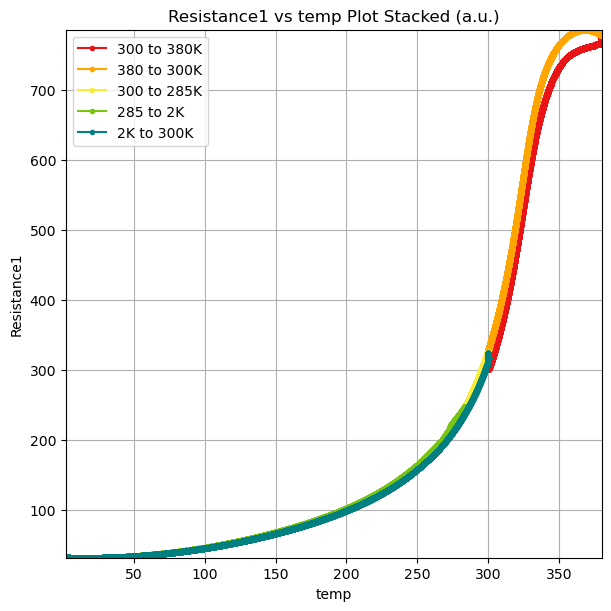

In [49]:
filelist= ['20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_RvT_300Kto380K.dat','20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_RvT_380Kto300K.dat', '20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_RvT_300Kto2K.dat','20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_RvT_300Kto2K_00002.dat','20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_RvT_2Kto300K.dat']
namelist= ['300 to 380K','380 to 300K', '300 to 285K', '285 to 2K','2K to 300K']

multi_plot_stacked(series_ticker=filelist, series_labels=namelist, x='temp', y='Resistance1', skiprows=20, start_rows=None, end_rows=None, vertical_offset=0)


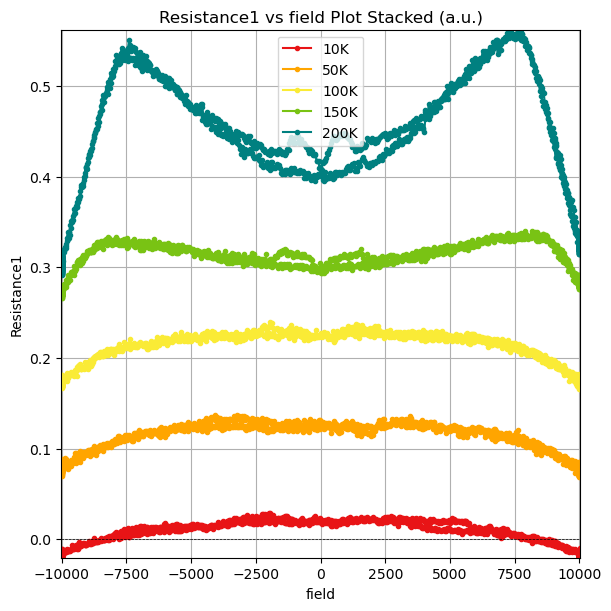

In [50]:
filelist= ['20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_10K_MR_pm1T.dat','20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_50K_MR_pm1T.dat',
           '20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_100K_MR_pm1T.dat', '20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_150K_MR_pm1T.dat',
           '20240801_LSMO15(100mT_700C_1000pls_0.65Jcm-2+30nm)_200K_MR_pm1T.dat']
namelist= ['10K','50K','100K', '150K', '200K']
multi_plot_stacked(filelist,namelist, 'field', 'Resistance1', skiprows=20, start_rows=[500,500,500,500,500], end_rows=[2500,2500,2500,2500,2500],vertical_offset=0.1, subtract_mean=1)

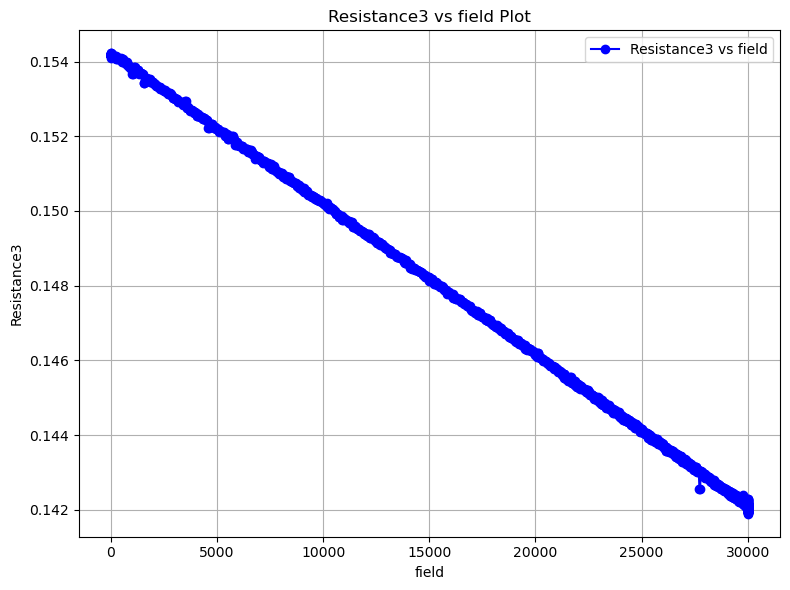

In [16]:
plot_dat_file('20240822_Cr2O3_48(20mT,600C)_Pt_top(5nm)_ch12(10um)_ch34(5um)_Rxx-0_005uA_Rxy-(ch1_ch3)1pt5mA_200K_3Tsweep.dat', 'field', 'Resistance3', skiprows=20)